# Basic Tutorial Notebook

## Package Imports

In [1]:
!python -m pip uninstall be_scan --yes
!python -m pip install git+https://github.com/liaulab/be-scan.git@feedback_fix

# ! python -m pip install statsmodels

Found existing installation: be_scan 0.0.2
Uninstalling be_scan-0.0.2:
  Successfully uninstalled be_scan-0.0.2
  Cloning https://github.com/liaulab/be-scan.git (to revision feedback_fix) to /private/var/folders/zg/n1xk_ddd26n29rcnygly3q0c0000gn/T/pip-req-build-_n52hs9g
  Running command git clone --filter=blob:none --quiet https://github.com/liaulab/be-scan.git /private/var/folders/zg/n1xk_ddd26n29rcnygly3q0c0000gn/T/pip-req-build-_n52hs9g
  Running command git checkout -b feedback_fix --track origin/feedback_fix
  Switched to a new branch 'feedback_fix'
  branch 'feedback_fix' set up to track 'origin/feedback_fix'.
  Resolved https://github.com/liaulab/be-scan.git to commit 58c8ce423de6cd7c550ca0e4cedee5b606c61981
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for be_scan: filename=be_scan-0.0.2-py3-none-any.whl size=91658 sha256=3868efd733a602ad1446b7194d4e6037a920b8638db9bda7b829

In [2]:
import warnings
warnings.filterwarnings('ignore')
import be_scan

Note: all annotate_guides.csv needs information about type of mutation (Missense, Silent, Nonsense, No_A/Exon, Control) and where the edit is along the gene (integer)

## be_scan.sgrna Function Calls

In [3]:
sgrna_dir = "../../../tests/test_data/sgrna/"

### Function 1 be_scan.sgrna.generate_library()

In [4]:
from be_scan.sgrna import generate_library

guides = generate_library(gene_filepath  = f"{sgrna_dir}230408_AR_Input.fasta", # filepath to gene .fasta
                          cas_type       = "SpG", 
                          edit_from      = "C", 
                          edit_to        = "T",
                          gene_name      = "AR", 
                          exclude_introns = False, # include guides that only target introns
                          output_name     = "CBE_guides.csv",
                          )
guides.head(5)

Create gene object from ../../../tests/test_data/sgrna/230408_AR_Input.fasta
Parsing exons: 8 exons found
Preprocessing sucessful
Guides generated and duplicates removed
1324 guides were generated


,sgRNA_seq,PAM_seq,starting_frame,gene_pos,chr_pos,exon,coding_seq,sgRNA_strand,gene_strand,gene,domain
0,gattcagccaagctcaaggA,TGG,2,-19,67545128,0,gattcagccaagctcaaggA,sense,plus,AR,No Domain
1,attcagccaagctcaaggAT,GGA,0,-18,67545129,0,attcagccaagctcaaggAT,sense,plus,AR,No Domain
2,cagccaagctcaaggATGGA,AGT,0,-15,67545132,0,cagccaagctcaaggATGGA,sense,plus,AR,No Domain
3,gccaagctcaaggATGGAAG,TGC,2,-13,67545134,0,gccaagctcaaggATGGAAG,sense,plus,AR,No Domain
4,aagctcaaggATGGAAGTGC,AGT,2,-10,67545137,0,aagctcaaggATGGAAGTGC,sense,plus,AR,No Domain


### Function 2 be_scan.sgrna.annotate()

In [5]:
from be_scan.sgrna import annotate

annotated_guides = annotate(guides_file      = "CBE_guides.csv",
                            gene_filepath    = "", # this can be left empty if guides are already annotated
                            edit_from        = "C",
                            edit_to          = "T",
                            protein_filepath = f"{sgrna_dir}P10275.fasta", 
                            output_name      = 'CBE_annotated.csv',
                            )
annotated_guides.head(5)

Guides annotated


,sgRNA_seq,PAM_seq,starting_frame,gene_pos,chr_pos,exon,coding_seq,sgRNA_strand,gene_strand,gene,...,CtoT_editing_window,CtoT_win_overlap,C_count,CtoT_target_CDS,CtoT_codon_window,CtoT_residue_window,CtoT_edit_site,CtoT_mutations,CtoT_muttypes,CtoT_muttype
0,gattcagccaagctcaaggA,TGG,2,-19,67545128,0,gattcagccaagctcaaggA,sense,plus,AR,...,"(-16, -12)",Intron,0,tcagc,attcagcca,___,-5.0,[],[],None
1,attcagccaagctcaaggAT,GGA,0,-18,67545129,0,attcagccaagctcaaggAT,sense,plus,AR,...,"(-15, -11)",Intron,0,cagcc,cagccaagc,___,-5.0,[],[],None
2,cagccaagctcaaggATGGA,AGT,0,-15,67545132,0,cagccaagctcaaggATGGA,sense,plus,AR,...,"(-12, -8)",Intron,0,ccaag,ccaagctca,___,-4.0,[],[],None
3,gccaagctcaaggATGGAAG,TGC,2,-13,67545134,0,gccaagctcaaggATGGAAG,sense,plus,AR,...,"(-10, -6)",Intron,0,aagct,ccaagctca,___,-3.0,[],[],None
4,aagctcaaggATGGAAGTGC,AGT,2,-10,67545137,0,aagctcaaggATGGAAGTGC,sense,plus,AR,...,"(-7, -3)",Intron,0,ctcaa,agctcaagg,___,-2.0,[],[],None


### Function 3 be_scan.sgrna.reference_check()

This function takes about a minute to run independent of library size. 
This step is not necessary and can be skipped. 

Run the following cell to download a reference genome: 

In [ ]:
! wget http://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz
! gunzip hg38.fa.gz

Then run the following function: 

In [7]:
from be_scan.sgrna import reference_check

checked_guides = reference_check(guides_file  = "CBE_annotated.csv", # file generated from previous step
                                 genome_file  = f"{sgrna_dir}hg38_short.fa",
                                 output_name  = 'CBE_filtered.csv',
                                 )
checked_guides.head(5)

5962 lines processed from ../../../tests/test_data/sgrna/hg38_short.fa
0 guides out of 1324 guides occurred more than once in the reference genome
Guides checked against reference genome


,sgRNA_seq,PAM_seq,starting_frame,gene_pos,chr_pos,exon,coding_seq,sgRNA_strand,gene_strand,gene,...,CtoT_win_overlap,C_count,CtoT_target_CDS,CtoT_codon_window,CtoT_residue_window,CtoT_edit_site,CtoT_mutations,CtoT_muttypes,CtoT_muttype,genome_occurrences
0,gattcagccaagctcaaggA,TGG,2,-19,67545128,0,gattcagccaagctcaaggA,sense,plus,AR,...,Intron,0,tcagc,attcagcca,___,-5.0,[],[],NaN,0
1,attcagccaagctcaaggAT,GGA,0,-18,67545129,0,attcagccaagctcaaggAT,sense,plus,AR,...,Intron,0,cagcc,cagccaagc,___,-5.0,[],[],NaN,0
2,cagccaagctcaaggATGGA,AGT,0,-15,67545132,0,cagccaagctcaaggATGGA,sense,plus,AR,...,Intron,0,ccaag,ccaagctca,___,-4.0,[],[],NaN,0
3,gccaagctcaaggATGGAAG,TGC,2,-13,67545134,0,gccaagctcaaggATGGAAG,sense,plus,AR,...,Intron,0,aagct,ccaagctca,___,-3.0,[],[],NaN,0
4,CTTCCATccttgagcttggc,tga,0,6,67545153,0,gccaagctcaaggATGGAAG,antisense,plus,AR,...,Intron,2,gATGG,aggATGGAA,_ME,0.0,"['E2K', 'M1I', 'M1I/E2K']",['Missense'],Missense,0


### Function 1-3 Combined be_scan.sgrna.design_library()

In [8]:
from be_scan.sgrna import design_library

guides = design_library(gene_filepath    = f"{sgrna_dir}230408_AR_Input.fasta", 
                        genome_file      = f"{sgrna_dir}hg38_short.fa",
                        cas_type         = "SpG", 
                        edit_from        = "A", 
                        edit_to          = "G",
                        protein_filepath = f"{sgrna_dir}P10275.fasta", 
                        gene_name        = "AR", 
                        exclude_introns  = False, 
                        output_name      = 'ABE_filtered.csv'
                        )
guides.head(5)

Create gene object from ../../../tests/test_data/sgrna/230408_AR_Input.fasta
Parsing exons: 8 exons found
Preprocessing sucessful
Guides generated and duplicates removed
1108 guides were generated
5962 lines processed from ../../../tests/test_data/sgrna/hg38_short.fa
0 guides out of 1108 guides occurred more than once in the reference genome
Guides checked against reference genome
Guides annotated
Complete! Library generated from ../../../tests/test_data/sgrna/230408_AR_Input.fasta


,sgRNA_seq,PAM_seq,starting_frame,gene_pos,chr_pos,exon,coding_seq,sgRNA_strand,gene_strand,gene,...,AtoG_editing_window,AtoG_win_overlap,A_count,AtoG_target_CDS,AtoG_codon_window,AtoG_residue_window,AtoG_edit_site,AtoG_mutations,AtoG_muttypes,AtoG_muttype
0,gattcagccaagctcaaggA,TGG,2,-19,67545128,0,gattcagccaagctcaaggA,sense,plus,AR,...,"(-16, -12)",Intron,0,tcagc,attcagcca,___,-5.0,[],[],None
1,attcagccaagctcaaggAT,GGA,0,-18,67545129,0,attcagccaagctcaaggAT,sense,plus,AR,...,"(-15, -11)",Intron,0,cagcc,cagccaagc,___,-5.0,[],[],None
2,cagccaagctcaaggATGGA,AGT,0,-15,67545132,0,cagccaagctcaaggATGGA,sense,plus,AR,...,"(-12, -8)",Intron,0,ccaag,ccaagctca,___,-4.0,[],[],None
3,gccaagctcaaggATGGAAG,TGC,2,-13,67545134,0,gccaagctcaaggATGGAAG,sense,plus,AR,...,"(-10, -6)",Intron,0,aagct,ccaagctca,___,-3.0,[],[],None
4,CTTCCATccttgagcttggc,tga,0,6,67545153,0,gccaagctcaaggATGGAAG,antisense,plus,AR,...,"(3, -1)",Intron,1,gATGG,aggATGGAA,_ME,0.0,[M1T],[Missense],Missense


### Supplemental Function: be_scan.sgrna.add_guide_df()

In [9]:
from be_scan.sgrna import add_guide_df

control_add_guides = add_guide_df(guides_df_filepath     = f"{sgrna_dir}ARSpGCBE_annotated_guides.csv",
                                  additional_df_filepath = f"{sgrna_dir}control_lib.csv",
                                  )

control_add_guides.head(5)

,sgRNA_seq,starting_frame,gene_pos,chr_pos,exon,coding_seq,sgRNA_strand,gene_strand,gene,genome_occurrences,editing_window,win_overlap,C_count,target_CDS,codon_window,residue_window,edit_site,mutations,muttypes,muttype
0,AAGTGCAGTTAGGGCTGGGAAGG,1.0,4.0,67545151.0,0.0,AAGTGCAGTTAGGGCTGGGAAGG,sense,plus,AR,1.0,"(7, 11)",Exon,1.0,TGCAG,GTGCAGTTA,VQL,3.0,['Q4.'],['Nonsense'],Nonsense
1,AGTGCAGTTAGGGCTGGGAAGGG,2.0,5.0,67545152.0,0.0,AGTGCAGTTAGGGCTGGGAAGGG,sense,plus,AR,1.0,"(8, 12)",Exon,1.0,GCAGT,GTGCAGTTA,VQL,3.0,['Q4.'],['Nonsense'],Nonsense
2,GTGCAGTTAGGGCTGGGAAGGGT,0.0,6.0,67545153.0,0.0,GTGCAGTTAGGGCTGGGAAGGGT,sense,plus,AR,1.0,"(9, 13)",Exon,1.0,CAGTT,CAGTTAGGG,QLG,3.0,['Q4.'],['Nonsense'],Nonsense
3,AAGGGTCTACCCTCGGCCGCCGT,2.0,23.0,67545170.0,0.0,AAGGGTCTACCCTCGGCCGCCGT,sense,plus,AR,1.0,"(26, 30)",Exon,1.0,GGTCT,AGGGTCTAC,RVY,9.0,[''],['Silent'],Silent
4,CTACCCTCGGCCGCCGTCCAAGA,2.0,29.0,67545176.0,0.0,CTACCCTCGGCCGCCGTCCAAGA,sense,plus,AR,1.0,"(32, 36)",Exon,4.0,CCCTC,TACCCTCGG,YPR,11.0,"['R13W', 'P12L', 'P12L/R13W', 'P12S', 'P12S/R1...","['Missense', 'Silent']",Mixed


### Supplemental Function: be_scan.sgrna.merge_guide_df()

In [10]:
from be_scan.sgrna import merge_guide_df

merged_guides = merge_guide_df(guide_df1_filepath=f"{sgrna_dir}ARSpGCBE_annotated_guides.csv",
                               guide_df2_filepath=f"{sgrna_dir}ARSpGABE_annotated_guides.csv",
                               )
merged_guides.head(5)

,sgRNA_seq,starting_frame,gene_pos,chr_pos,exon,coding_seq,sgRNA_strand,gene_strand,gene,genome_occurrences,...,win_overlap,C_count,target_CDS,codon_window,residue_window,edit_site,mutations,muttypes,muttype,A_count
3,AAGGGTCTACCCTCGGCCGCCGT,2,23,67545170,0,AAGGGTCTACCCTCGGCCGCCGT,sense,plus,AR,1,...,Exon,1.0,GGTCT,AGGGTCTAC,RVY,9.0,[''],['Silent'],Silent,NaN
4,CTACCCTCGGCCGCCGTCCAAGA,2,29,67545176,0,CTACCCTCGGCCGCCGTCCAAGA,sense,plus,AR,1,...,Exon,4.0,CCCTC,TACCCTCGG,YPR,11.0,"['R13W', 'P12L', 'P12L/R13W', 'P12S', 'P12S/R1...","['Missense', 'Silent']",Mixed,NaN
5,GGCCGCCGTCCAAGACCTACCGA,1,37,67545184,0,GGCCGCCGTCCAAGACCTACCGA,sense,plus,AR,1,...,Exon,3.0,CGCCG,CCGCCGTCC,PPS,14.0,"['P15L', 'P15S', 'P15L', 'P14L', 'P14L/P15L', ...",['Missense'],Missense,NaN
6,CGCCGTCCAAGACCTACCGAGGA,1,40,67545187,0,CGCCGTCCAAGACCTACCGAGGA,sense,plus,AR,1,...,Exon,3.0,CGTCC,CCGTCCAAG,PSK,15.0,"['', 'S16F', 'S16F', 'P15L', 'P15L', 'P15L/S16...","['Missense', 'Silent']",Mixed,NaN
8,AGCTTTCCAGAATCTGTTCCAGA,2,62,67545209,0,AGCTTTCCAGAATCTGTTCCAGA,sense,plus,AR,1,...,Exon,2.0,TTTCC,GCTTTCCAG,AFQ,22.0,"['Q24.', '', 'Q24.']","['Missense', 'Nonsense', 'Silent']",Mixed,NaN


### Supplemental Function: be_scan.sgrna.annotate_guides() for unannotated dataframes

In [11]:
from be_scan.sgrna import annotate

annotated_guides = annotate(guides_file      = f"{sgrna_dir}ARSpGCBE_guides_clipped.csv",
                            gene_filepath    = f"{sgrna_dir}230408_AR_Input.fasta",
                            edit_from        = "C",
                            edit_to          = "T",
                            protein_filepath = f"{sgrna_dir}P10275.fasta", 
                            )
annotated_guides.head(5)

Warning starting_frame not found
Warning sgRNA_strand not found. No information about direction (sense, antisense).
The guide TGCCTGgtaaggaaaagggaagt match sense and antisense strands.
The guide TGCAGCCTgtaagcaaacgatgg has many occurrences.
The guide GCAGCCTgtaagcaaacgatgga match sense and antisense strands.
The guide AGCCTgtaagcaaacgatggagg match sense and antisense strands.
The guide AAGCctggagaagaagaggcaga match sense and antisense strands.
The guide CGGAAGCctggagaagaagaggc match sense and antisense strands.
Guides annotated


,sgRNA_seq,gene,gene_pos,starting_frame,sgRNA_strand,coding_seq,CtoT_editing_window,CtoT_win_overlap,C_count,CtoT_target_CDS,CtoT_codon_window,CtoT_residue_window,CtoT_edit_site,CtoT_mutations,CtoT_muttypes,CtoT_muttype
0,AAGTGCAGTTAGGGCTGGGAAGG,AR,4,1,sense,AAGTGCAGTTAGGGCTGGGAAGG,"(7, 11)",Exon,1,TGCAG,GTGCAGTTA,VQL,3.0,[Q4.],[Nonsense],Nonsense
1,AGTGCAGTTAGGGCTGGGAAGGG,AR,5,2,sense,AGTGCAGTTAGGGCTGGGAAGGG,"(8, 12)",Exon,1,GCAGT,GTGCAGTTA,VQL,3.0,[Q4.],[Nonsense],Nonsense
2,GTGCAGTTAGGGCTGGGAAGGGT,AR,6,0,sense,GTGCAGTTAGGGCTGGGAAGGGT,"(9, 13)",Exon,1,CAGTT,CAGTTAGGG,QLG,3.0,[Q4.],[Nonsense],Nonsense
3,AAGGGTCTACCCTCGGCCGCCGT,AR,23,2,sense,AAGGGTCTACCCTCGGCCGCCGT,"(26, 30)",Exon,1,GGTCT,AGGGTCTAC,RVY,9.0,[],[Silent],Silent
4,CTACCCTCGGCCGCCGTCCAAGA,AR,29,2,sense,CTACCCTCGGCCGCCGTCCAAGA,"(32, 36)",Exon,4,CCCTC,TACCCTCGG,YPR,11.0,"[R13W, P12L, P12L/R13W, P12S, P12S/R13W, P12F,...","[Missense, Silent]",Mixed


### Supplemental Function: be_scan.sgrna.annotate_guides() for dual editor

In [12]:
from be_scan.sgrna import annotate

annotated_guides = annotate(guides_file      = "CBE_guides.csv",
                                   gene_filepath    = f"{sgrna_dir}230408_AR_Input.fasta",
                                   edit_from        = "CA",
                                   edit_to          = "TG",
                                   protein_filepath = f"{sgrna_dir}P10275.fasta", 
                                   )
annotated_guides.head(5)

Guides annotated


,sgRNA_seq,PAM_seq,starting_frame,gene_pos,chr_pos,exon,coding_seq,sgRNA_strand,gene_strand,gene,...,CAtoTG_editing_window,CAtoTG_win_overlap,CA_count,CAtoTG_target_CDS,CAtoTG_codon_window,CAtoTG_residue_window,CAtoTG_edit_site,CAtoTG_mutations,CAtoTG_muttypes,CAtoTG_muttype
0,gattcagccaagctcaaggA,TGG,2,-19,67545128,0,gattcagccaagctcaaggA,sense,plus,AR,...,"(-16, -12)",Intron,0,tcagc,attcagcca,___,-5.0,[],[],None
1,attcagccaagctcaaggAT,GGA,0,-18,67545129,0,attcagccaagctcaaggAT,sense,plus,AR,...,"(-15, -11)",Intron,0,cagcc,cagccaagc,___,-5.0,[],[],None
2,cagccaagctcaaggATGGA,AGT,0,-15,67545132,0,cagccaagctcaaggATGGA,sense,plus,AR,...,"(-12, -8)",Intron,0,ccaag,ccaagctca,___,-4.0,[],[],None
3,gccaagctcaaggATGGAAG,TGC,2,-13,67545134,0,gccaagctcaaggATGGAAG,sense,plus,AR,...,"(-10, -6)",Intron,0,aagct,ccaagctca,___,-3.0,[],[],None
4,aagctcaaggATGGAAGTGC,AGT,2,-10,67545137,0,aagctcaaggATGGAAGTGC,sense,plus,AR,...,"(-7, -3)",Intron,0,ctcaa,agctcaagg,___,-2.0,[],[],None


## be_scan.analysis Function Calls

Sample sheet is set up like this: 

| sample_id | fastq_file       | condition  | agg_conditions | counts_file  | noncounts_file  | stats_file  |
| --------- | ----------       | ---------  | -------------- | -----------  | --------------  | ----------  |
| 0         | control.fastq.gz | t0         | t0             | counts-1.csv | noncounts-1.csv | stats-1.txt |
| 1         | cond_A1.fastq.gz | unsorted-1 | unsorted       | counts-2.csv | noncounts-2.csv | stats-2.txt |
| 2         | cond_A2.fastq.gz | unsorted-2 | unsorted       | counts-3.csv | noncounts-3.csv | stats-3.txt |
| 3         | cond_A3.fastq.gz | unsorted-3 | unsorted       | counts-4.csv | noncounts-4.csv | stats-4.txt |
| 4         | cond_B1.fastq.gz | sorted-1   | sorted         | counts-5.csv | noncounts-5.csv | stats-5.txt |
| 5         | cond_B2.fastq.gz | sorted-2   | sorted         | counts-6.csv | noncounts-6.csv | stats-6.txt |
| 6         | cond_B3.fastq.gz | sorted-3   | sorted         | counts-7.csv | noncounts-7.csv | stats-7.txt |

Comparisons sheet is set up like this: 

| name | treatment | control |
| ---- | --------- | ------- |
| sorted-unsorted | sorted | unsorted |

The names for treatment and control in the comparison sheet should correspond to the agg_conditions in the sample sheet

In [13]:
analysis_dir = "../../../tests/test_data/analysis/"

### Function 1: be_scan.analysis.count_reads()

In [14]:
import be_scan

be_scan.analysis.count_reads(
    sample_sheet  = f"{analysis_dir}sample_sheet.csv", 
    annotated_lib = f"{analysis_dir}annotated_lib_sample_in.csv", 
    file_dir     = analysis_dir, 
    KEY_INTERVAL = (0,35),
    KEY          = "ABCDEF",
    KEY_REV      = "GHIJKL",
    save         = False, 
)


../../../tests/test_data/analysis/dummy1.fastq processed
../../../tests/test_data/analysis/dummy2.fastq processed
../../../tests/test_data/analysis/dummy3.fastq processed
../../../tests/test_data/analysis/dummy4.fastq processed
Count reads completed


,sgRNA_seq,gene,counts1,counts2,counts3,counts4
0,AAAAAAAAAAAAAAAAAAAA,gene,100,98,95,105
1,BBBBBBBBBBBBBBBBBBBB,gene,100,0,1,2
2,CCCCCCCCCCCCCCCCCCCC,gene,0,90,92,100
3,DDDDDDDDDDDDDDDDDDDD,gene,0,0,2,4
4,EEEEEEEEEEEEEEEEEEEE,control,100,90,92,84
5,FFFFFFFFFFFFFFFFFFFF,control,100,85,87,86


### Function 2: be_scan.analysis.merge_and_norm()

In [15]:
import be_scan

be_scan.analysis.merge_and_norm(
    sample_sheet  = f"{analysis_dir}sample_sheet.csv",
    counts_library = f"{analysis_dir}count_reads_sample_out.csv", 
    controls = ["counts1"],
)

merge_and_norm outputed to /Users/calvinxyh/Documents/GitHub/be_scan/docs/source/notebooks/agg_log2_t0.csv
Merge and normalize completed


,sgRNA_seq,gene,counts1,counts2,counts3,counts4,counts1_subt0,counts2_log2,counts2_subt0,counts3_log2,counts3_subt0,counts4_log2,counts4_subt0
0,AAAAAAAAAAAAAAAAAAAA,gene,100,98,95,105,0.0,18.042458,0.110884,17.973953,0.042378,18.049630,0.118055
1,BBBBBBBBBBBBBBBBBBBB,gene,100,0,1,2,0.0,0.000000,-17.931574,11.404624,-6.526951,12.335658,-5.595916
2,CCCCCCCCCCCCCCCCCCCC,gene,0,90,92,100,0.0,17.919602,17.919602,17.927659,17.927659,17.979241,17.979241
3,DDDDDDDDDDDDDDDDDDDD,gene,0,0,2,4,0.0,0.000000,0.000000,12.404358,12.404358,13.335518,13.335518
4,EEEEEEEEEEEEEEEEEEEE,control,100,90,92,90,0.0,17.919602,-0.011973,17.927659,-0.003915,17.827238,-0.104336
5,FFFFFFFFFFFFFFFFFFFF,control,100,85,87,86,0.0,17.837140,-0.094434,17.847041,-0.084533,17.761650,-0.169924


### Function 3: be_scan.analysis.average_reps()

In [16]:
import be_scan

be_scan.analysis.average_reps(
    sample_sheet  = f"{analysis_dir}sample_sheet.csv",
    log2_subt0    = f"{analysis_dir}merge_and_norm_sample_out.csv", 
)

average_reps outputed to /Users/calvinxyh/Documents/GitHub/be_scan/docs/source/notebooks/avg_conds.csv
Average reps completed


,sgRNA_seq,gene,counts1,counts2,counts3,counts4,counts1_subt0,counts2_log2,counts2_subt0,counts3_log2,counts3_subt0,counts4_log2,counts4_subt0,t0,t0_stdev,cond1,cond1_stdev
0,AAAAAAAAAAAAAAAAAAAA,gene,100,98,95,105,0.0,18.042458,0.110884,17.973953,0.042378,18.049630,0.118055,0.0,0,0.090439,0.041776
1,BBBBBBBBBBBBBBBBBBBB,gene,100,0,1,2,0.0,0.000000,-17.931574,11.404624,-6.526951,12.335658,-5.595916,0.0,0,-10.018147,6.869021
2,CCCCCCCCCCCCCCCCCCCC,gene,0,90,92,100,0.0,17.919602,17.919602,17.927659,17.927659,17.979241,17.979241,0.0,0,17.942167,0.032358
3,DDDDDDDDDDDDDDDDDDDD,gene,0,0,2,4,0.0,0.000000,0.000000,12.404358,12.404358,13.335518,13.335518,0.0,0,8.579959,7.445034
4,EEEEEEEEEEEEEEEEEEEE,control,100,90,92,90,0.0,17.919602,-0.011973,17.927659,-0.003915,17.827238,-0.104336,0.0,0,-0.040075,0.055798
5,FFFFFFFFFFFFFFFFFFFF,control,100,85,87,86,0.0,17.837140,-0.094434,17.847041,-0.084533,17.761650,-0.169924,0.0,0,-0.116297,0.046705


### Function 4: be_scan.analysis.compare_conds()

In [17]:
be_scan.analysis.compare_conds(
    comparisons   = f"{analysis_dir}comparisons.csv", 
    avg_conds     = f"{analysis_dir}average_reps_sample_out.csv", 
)

compare_conds outputed to /Users/calvinxyh/Documents/GitHub/be_scan/docs/source/notebooks/conditions.csv
Compare conditions completed


,sgRNA_seq,gene,counts1,counts2,counts3,counts4,counts1_subt0,counts2_log2,counts2_subt0,counts3_log2,counts3_subt0,counts4_log2,counts4_subt0,t0,t0_stdev,cond1,cond1_stdev,cond1-cond1
0,AAAAAAAAAAAAAAAAAAAA,gene,100,98,95,105,0.0,18.042458,0.110884,17.973953,0.042378,18.049630,0.118055,0.0,0,0.090439,0.041776,0.0
1,BBBBBBBBBBBBBBBBBBBB,gene,100,0,1,2,0.0,0.000000,-17.931574,11.404624,-6.526951,12.335658,-5.595916,0.0,0,-10.018147,6.869021,0.0
2,CCCCCCCCCCCCCCCCCCCC,gene,0,90,92,100,0.0,17.919602,17.919602,17.927659,17.927659,17.979241,17.979241,0.0,0,17.942167,0.032358,0.0
3,DDDDDDDDDDDDDDDDDDDD,gene,0,0,2,4,0.0,0.000000,0.000000,12.404358,12.404358,13.335518,13.335518,0.0,0,8.579959,7.445034,0.0
4,EEEEEEEEEEEEEEEEEEEE,control,100,90,92,90,0.0,17.919602,-0.011973,17.927659,-0.003915,17.827238,-0.104336,0.0,0,-0.040075,0.055798,0.0
5,FFFFFFFFFFFFFFFFFFFF,control,100,85,87,86,0.0,17.837140,-0.094434,17.847041,-0.084533,17.761650,-0.169924,0.0,0,-0.116297,0.046705,0.0


### Function 5: be_scan.analysis.calc_controls()

In [18]:
import be_scan

be_scan.analysis.calc_controls(
    conditions          = f"{analysis_dir}compare_conds_sample_out.csv", 
    stats_comparisons   = ['cond1-cond1'], 
    neg_ctrl_col        = 'gene', 
    neg_ctrl_conditions = ['control'], 
    )

calc_controls outputed to /Users/calvinxyh/Documents/GitHub/be_scan/docs/source/notebooks/stats.txt
Calculating controls completed


### Function 1-5: be_scan.analysis.batch_process()

In [19]:
import be_scan
be_scan.analysis.batch_process(
    sample_sheet  = f"{analysis_dir}sample_sheet.csv", 
    annotated_lib = f"{analysis_dir}annotated_lib_sample_in.csv", 
    comparisons   = f"{analysis_dir}comparisons.csv", 
    neg_ctrl_col  = 'gene', 
    neg_ctrl_conditions = ['control'], 

    file_dir     = analysis_dir, 
    KEY_INTERVAL = (0,35),
    KEY          = "ABCDEF",
    KEY_REV      = "GHIJKL",
    controls = ["counts1"],
)

../../../tests/test_data/analysis/dummy1.fastq processed
../../../tests/test_data/analysis/dummy2.fastq processed
../../../tests/test_data/analysis/dummy3.fastq processed
../../../tests/test_data/analysis/dummy4.fastq processed
count_reads outputed to /Users/calvinxyh/Documents/GitHub/be_scan/docs/source/notebooks/counts_library.csv
Count reads completed
merge_and_norm outputed to /Users/calvinxyh/Documents/GitHub/be_scan/docs/source/notebooks/agg_log2_t0.csv
Merge and normalize completed
average_reps outputed to /Users/calvinxyh/Documents/GitHub/be_scan/docs/source/notebooks/avg_conds.csv
Average reps completed
compare_conds outputed to /Users/calvinxyh/Documents/GitHub/be_scan/docs/source/notebooks/conditions.csv
Compare conditions completed
calc_controls outputed to /Users/calvinxyh/Documents/GitHub/be_scan/docs/source/notebooks/stats.txt
Calculating controls completed


## be_scan.plot Function Calls

Starting from Nick's DNMT3A data in the .csv format and regenerating the scatterplot, boxplot, correlation heatmap, and correlation scatterplot. 

In [3]:
plot_file = '../../../tests/test_data/plot/NZL10196_v9_comparisons.csv'

### Function 1: be_scan.plot.scatterplot()

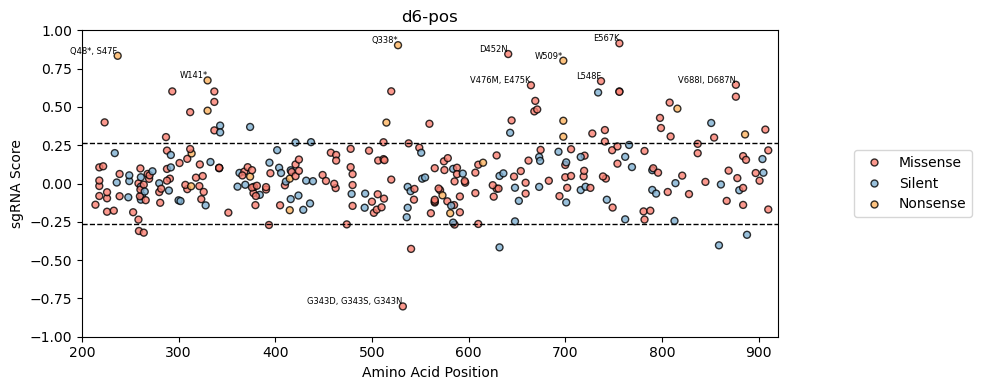

In [4]:
import be_scan

be_scan.plot.scatterplot(df_filepath  = plot_file, # data
        x_column     = 'Edit_site_3A1',  # name of a column in data
        comparisons  = ['d6-pos'],       # names of a column in data, each is a graph

        include_hue=True, hue_col='Mut_type', # color settings
        neg_ctrl=True, neg_ctrl_col='Gene', neg_ctrl_conditions=['NON-GENE'], # negative control points
        filter_params=True, params_cols=['Mut_type', 'Gene'], # filter for only these categories
        params_conditions=[['Nonsense', 'Missense', 'Silent'], ['DNMT3A']], 
        autoannot=True, autoannot_top=10, autoannot_label='Mut_list_all', # automatically label points
        xlim_kws={'xmin': 200, 'xmax': None}, savefig = False, # figure adjustments
        )

### Function 2: be_scan.plot.corr_heatmap()

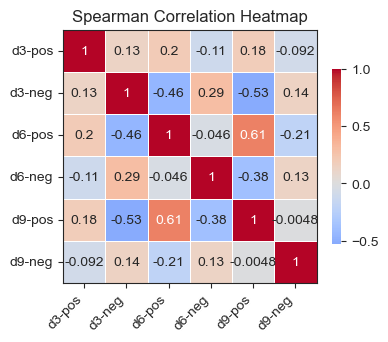

In [5]:
import be_scan

be_scan.plot.corr_heatmap(df_filepath = plot_file, # data
                          comparisons = ['d3-pos', 'd3-neg', 'd6-pos', 'd6-neg', 'd9-pos', 'd9-neg'], # names of columns in data
                          savefig     = False,
                          )

### Function 3: be_scan.plot.corr_jointplot()

R: -0.7088480332812986 (p-value 2.6007890349625913e-112)
R2: 0.5024655342867651


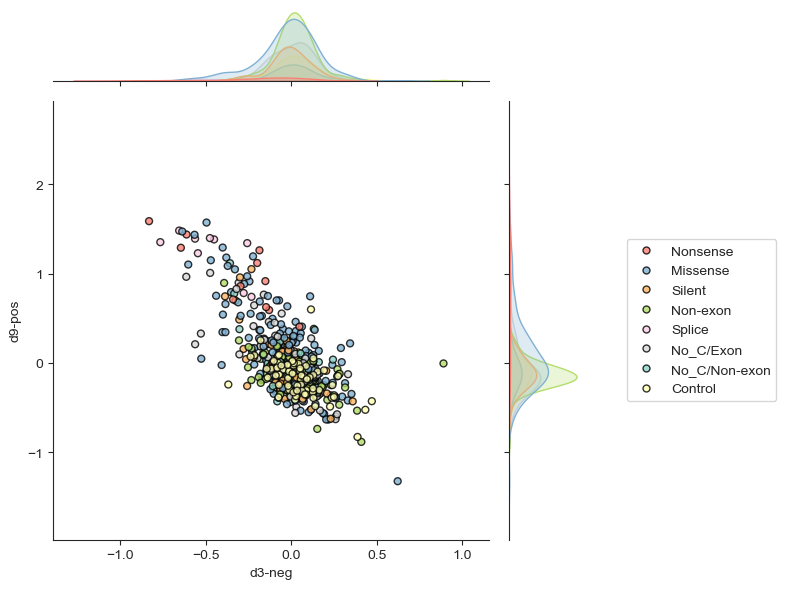

In [6]:
import be_scan

be_scan.plot.corr_jointplot(df_filepath = plot_file, condition1 = 'd3-neg', condition2 = 'd9-pos', # names of columns in data
                        include_hue = True, hue_col = 'Mut_type',  # name of a column in data
                        savefig = False,
                        )

### Function 4: be_scan.plot.boxplot()

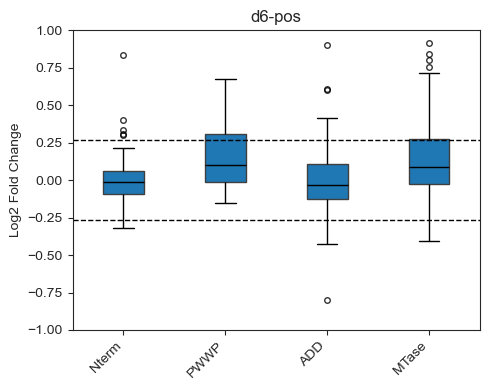

In [7]:
import be_scan

be_scan.plot.boxplot(df_filepath  = plot_file, # data
                     comparisons  = ['d6-pos'],  # name of a column in data, each column is a graph
                     plot_column = 'Domain', plot_conditions = ['PWWP', 'ADD', 'MTase', 'Nterm'], # how to split up boxes in graph
 
                     neg_ctrl=True, neg_ctrl_col='Gene', neg_ctrl_conditions=['NON-GENE'], 
                     filter_params=True, params_cols=['Win_overlap'], params_conditions=[['Exon']], 
                     savefig = False, 
)

### Function 5: be_scan.plot.sgrna_enrichment()

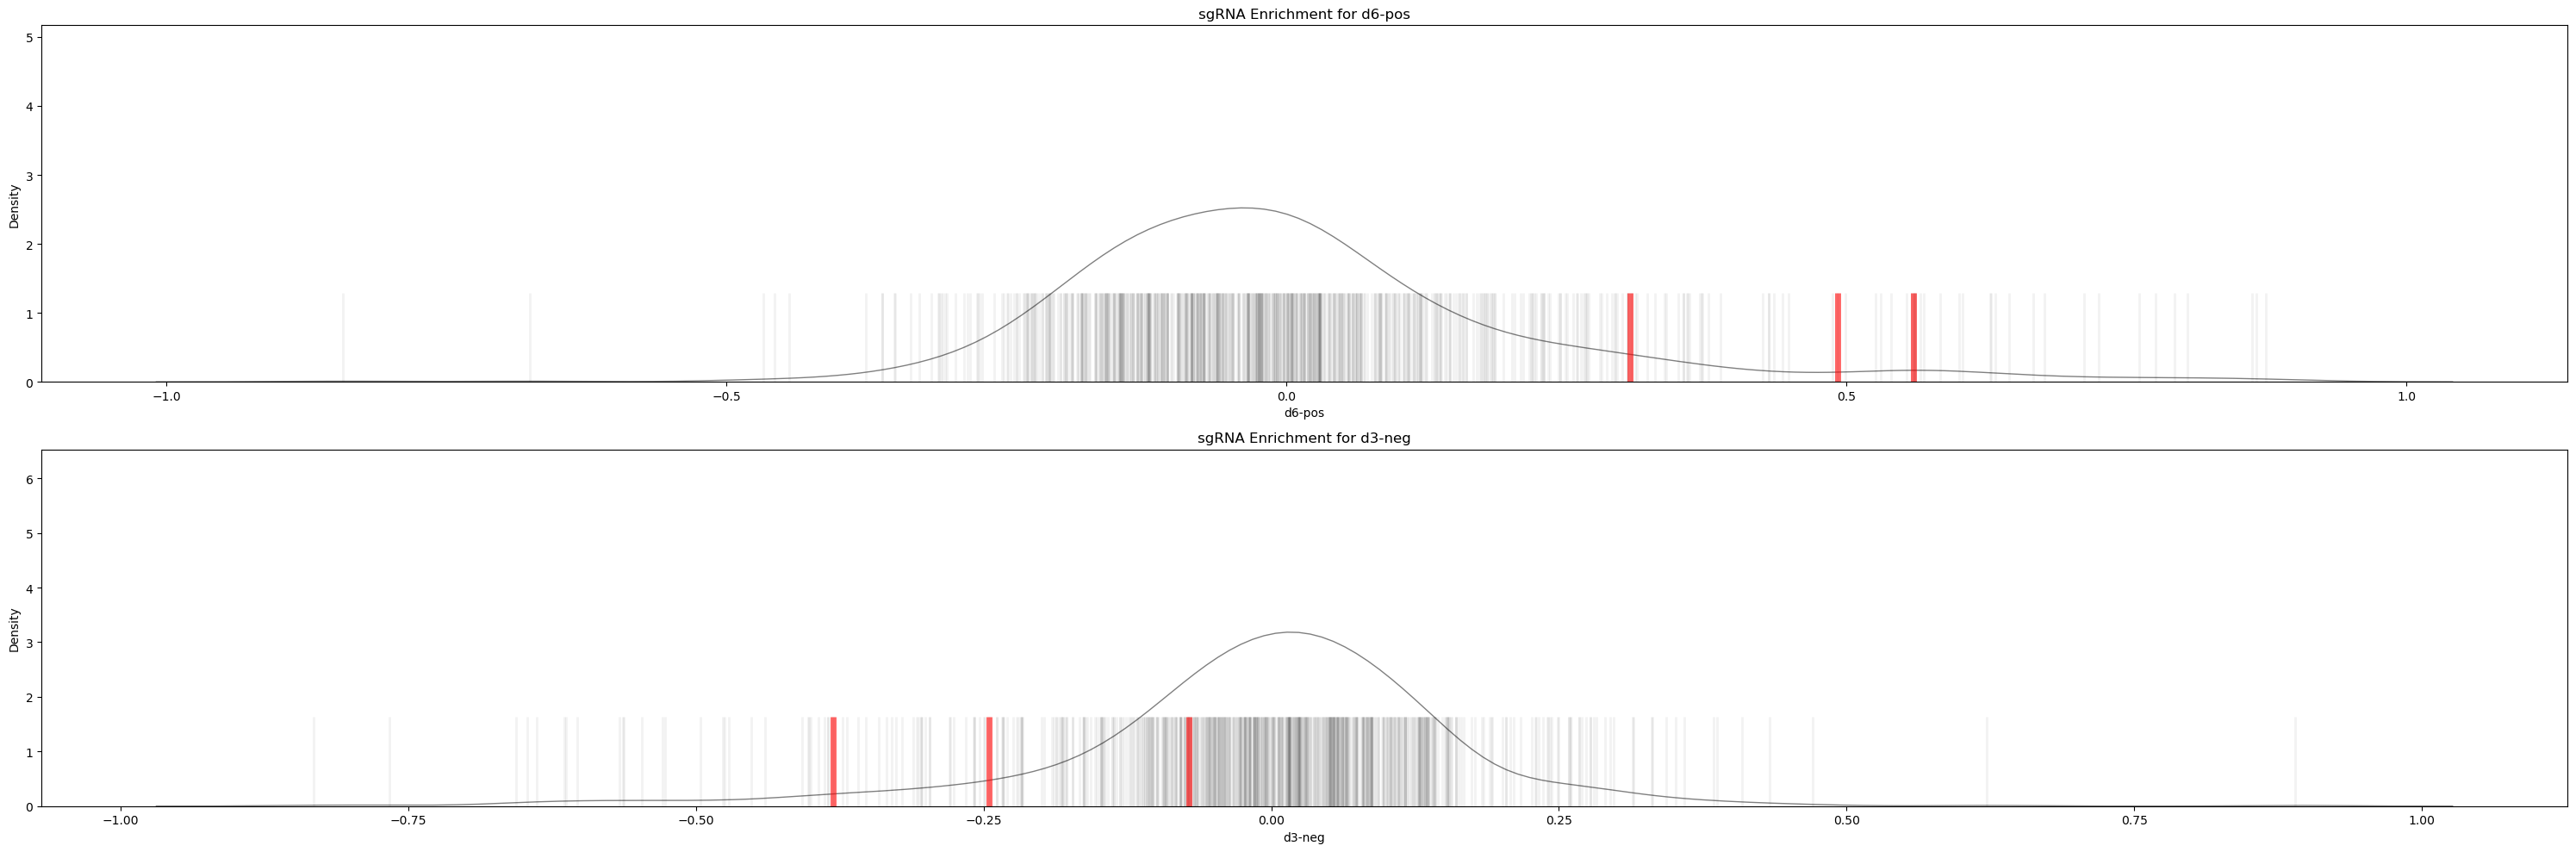

In [6]:
import be_scan

be_scan.plot.sgrna_enrichment(df_filepath  = plot_file, # data
                              comparisons  = ['d6-pos', 'd3-neg'],  # name of a column in data, each column is a graph
                              highlight=True, highlight_col='sgRNA_ID', 
                              highlight_vals=['DNMT3A2_149', 'DNMT3A2_150', 'DNMT3A2_151'], 

                              savefig = False, 
        )

### Function 5: be_scan.plot.cluster_1d()

Takes about 2 minutes to run for n_repeats=10,000

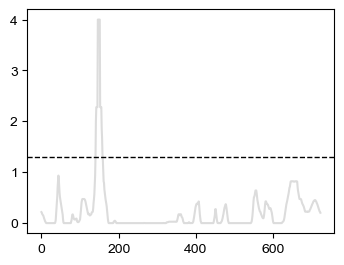

[(     x_vals   y_loess    type
  0       1.0  0.041550   loess
  1       2.0  0.037259  interp
  2       3.0  0.033041  interp
  3       4.0  0.028896  interp
  4       5.0  0.024825   loess
  ..      ...       ...     ...
  718   719.0  0.034853  interp
  719   720.0  0.034105  interp
  720   721.0  0.033347   loess
  721   722.0  0.032586   loess
  722   723.0  0.031822   loess
  
  [723 rows x 3 columns],
       0         1         2         3         4         5         6      \
  0      1.0 -0.035095  0.088618 -0.019683  0.000935 -0.035805  0.000803   
  1      2.0 -0.033850  0.083650 -0.017413 -0.000170 -0.035192 -0.002200   
  2      3.0 -0.032568  0.078769 -0.015158 -0.001217 -0.034545 -0.005164   
  3      4.0 -0.031251  0.073973 -0.012916 -0.002205 -0.033864 -0.008090   
  4      5.0 -0.029899  0.069263 -0.010688 -0.003136 -0.033149 -0.010977   
  ..     ...       ...       ...       ...       ...       ...       ...   
  718  719.0  0.035039 -0.010458  0.009324 -0.056242  0

In [6]:
import be_scan

be_scan.plot.loess_smoothing(df_filepath  = plot_file, # data
                             x_column='Edit_site',  
                             comparisons=['d3-pos', 'd6-pos'], span=0.05, n_repeats=10000, 
                             savefig = False, return_df=False, 
        )